# Library Import

Pandas
Importing the data into a dataframe; for manipulations of the dataframe and easy plotting

Numpy
For vector and matrix calculations

Matplotlib
For plotting

Seaborn
For plotting

SKLearn
For the machine learning part

Scipy
For some statistics


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colorbar as mpl

from sklearn.model_selection import train_test_split
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


# Data Import

In [2]:
data = pd.read_csv("data.csv", na_filter=False, skipinitialspace=True, thousands=',')
print(data.head())

   sweep_id  pdb_id_id  wavelength  MR_success  TFZ   LLG  PAK  mr_reso  \
0       144       1003      0.9797         0.0  5.8  33.0  5.0     1.38   
1       145       1003      0.9184         0.0  5.8  33.0  5.0     1.38   
2       146       1003      0.9792         0.0  5.8  33.0  5.0     1.38   
3       918        101      0.9793         0.0  4.1  17.0  1.0     1.66   
4       919        101      0.9537         0.0  4.1  17.0  1.0     1.66   

   mr_sg  mr_sg_no     ...       wilsonbfactor  RmeasI  highreslimit  \
0  P1211         4     ...               11.28  0.0723          1.38   
1  P1211         4     ...               11.30  0.0846          1.41   
2  P1211         4     ...               11.21  0.0879          1.39   
3     H3       146     ...               20.88  0.0910          1.66   
4     H3       146     ...               20.26  0.0937          1.67   

   RpimdiffI anomalousmulti  RmergediffI  totalobservations  anomalouscompl  \
0     0.0442           1.73       0.0

In [53]:
print(data.shape)

(673, 38)


# Isolate column names to use as features

In [3]:
column_names = data.columns
print(column_names)

Index(['sweep_id', 'pdb_id_id', 'wavelength', 'MR_success', 'TFZ', 'LLG',
       'PAK', 'mr_reso', 'mr_sg', 'mr_sg_no', 'RMSD', 'VRMS', 'eLLG', 'tncs',
       'model_pdb', 'seq_ident', 'model_res', 'anomalousCC', 'IoverSigma',
       'completeness', 'diffI', 'RmergeI', 'lowreslimit', 'RpimI',
       'multiplicity', 'RmeasdiffI', 'anomalousslope', 'diffF',
       'wilsonbfactor', 'RmeasI', 'highreslimit', 'RpimdiffI',
       'anomalousmulti', 'RmergediffI', 'totalobservations', 'anomalouscompl',
       'cchalf', 'totalunique'],
      dtype='object')


In [4]:
data_columns = data[['wavelength', 'TFZ', 'LLG', 'PAK', 'mr_reso',
       'mr_sg_no', 'RMSD', 'VRMS', 'eLLG', 'tncs', 'seq_ident',
       'model_res', 'anomalousCC', 'IoverSigma', 'completeness', 'diffI',
       'RmergeI', 'lowreslimit', 'RpimI', 'multiplicity', 'RmeasdiffI',
       'anomalousslope', 'diffF', 'wilsonbfactor', 'RmeasI', 'highreslimit',
       'RpimdiffI', 'anomalousmulti', 'RmergediffI', 'totalobservations',
       'anomalouscompl', 'cchalf', 'totalunique']]

data_columns_labels = data_columns.columns
print(data_columns_labels)

Index(['wavelength', 'TFZ', 'LLG', 'PAK', 'mr_reso', 'mr_sg_no', 'RMSD',
       'VRMS', 'eLLG', 'tncs', 'seq_ident', 'model_res', 'anomalousCC',
       'IoverSigma', 'completeness', 'diffI', 'RmergeI', 'lowreslimit',
       'RpimI', 'multiplicity', 'RmeasdiffI', 'anomalousslope', 'diffF',
       'wilsonbfactor', 'RmeasI', 'highreslimit', 'RpimdiffI',
       'anomalousmulti', 'RmergediffI', 'totalobservations', 'anomalouscompl',
       'cchalf', 'totalunique'],
      dtype='object')


# Fill in missing values

In [5]:
data_columns_fill = data_columns.fillna(0)

# Data split - test and training set 

In [6]:
y = data['MR_success']

X_train, X_test, y_train, y_test = train_test_split(data_columns_fill, y, 
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Plot histogram for each feature

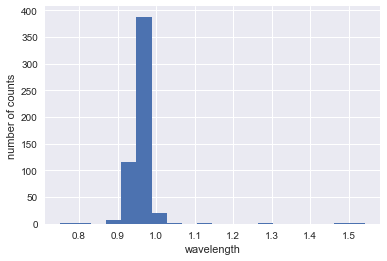

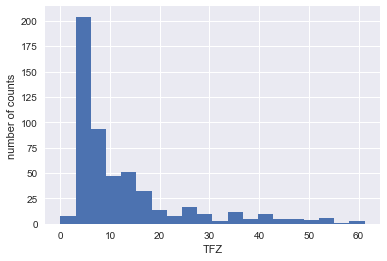

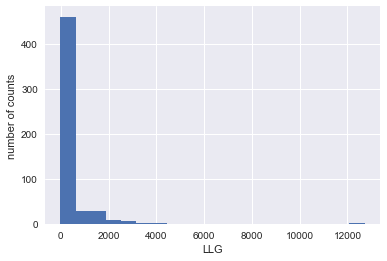

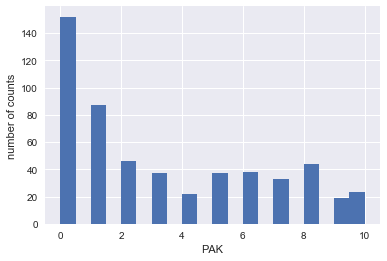

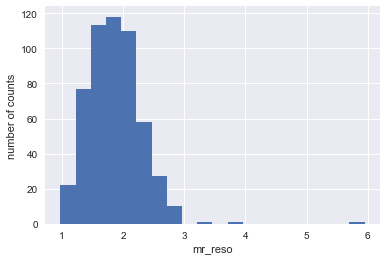

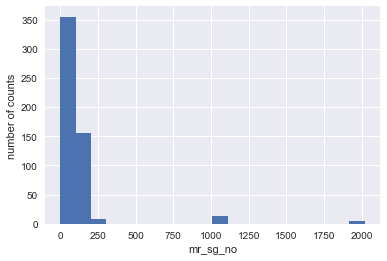

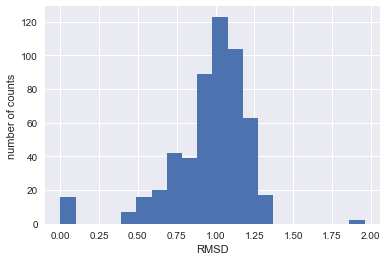

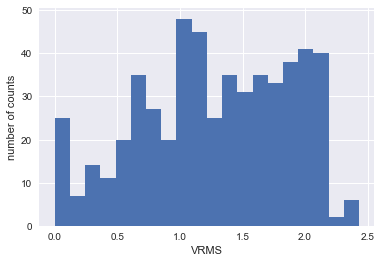

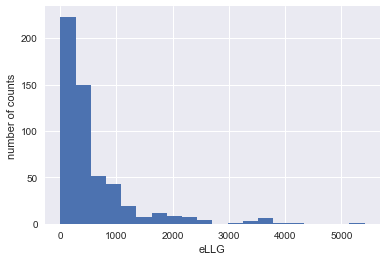

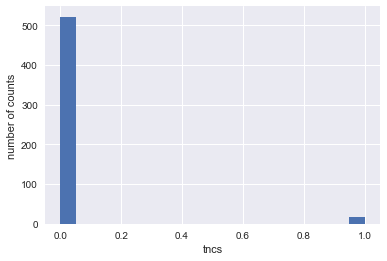

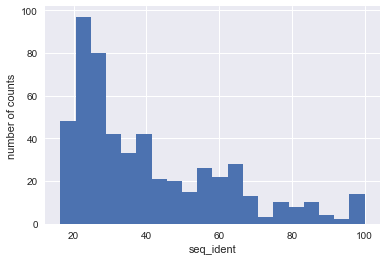

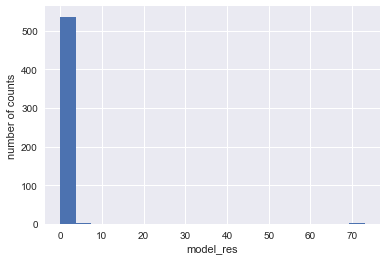

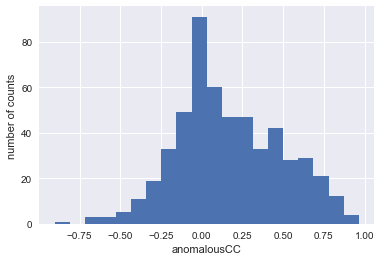

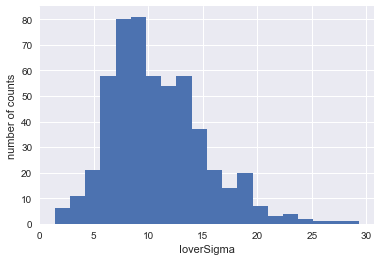

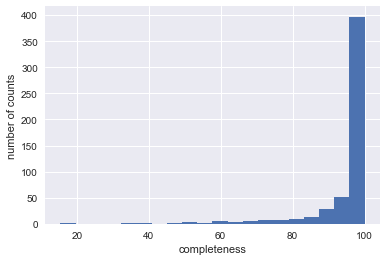

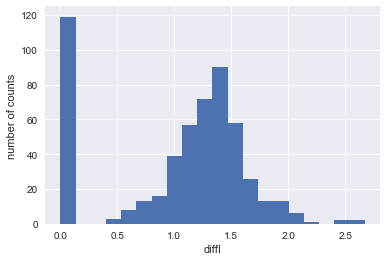

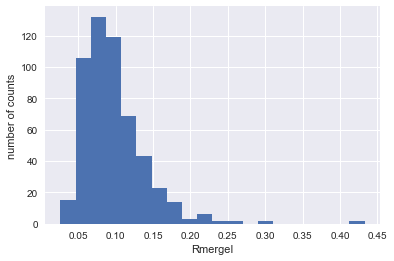

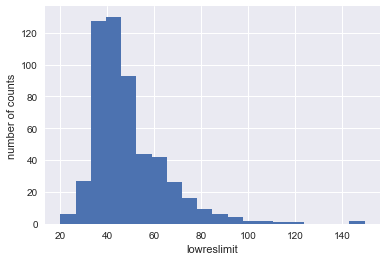

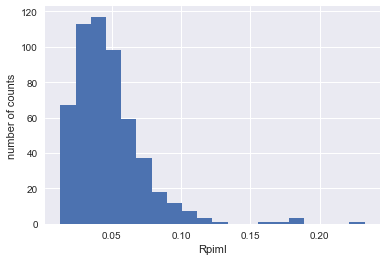

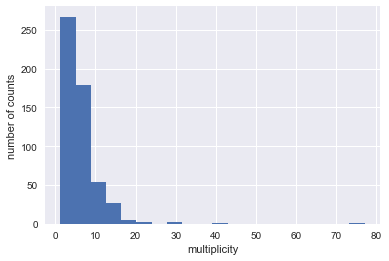

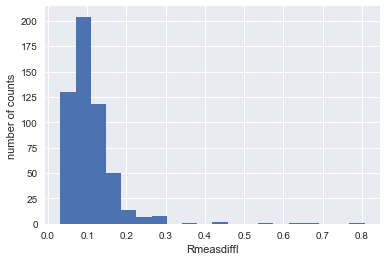

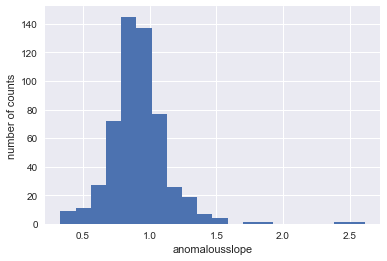

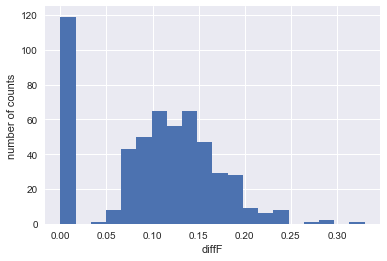

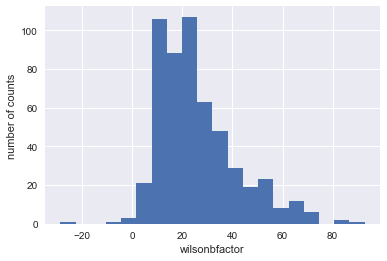

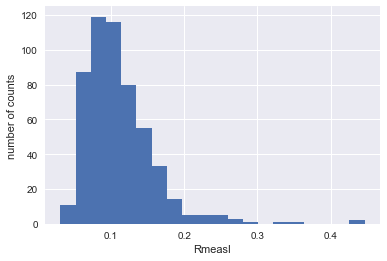

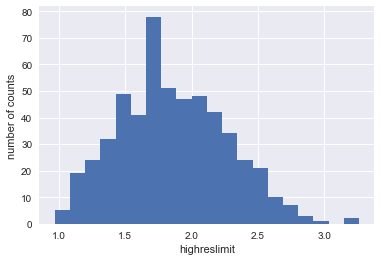

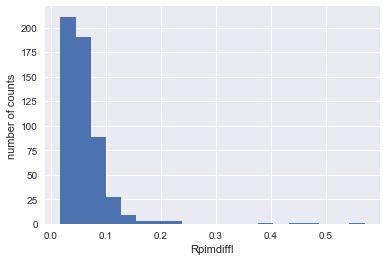

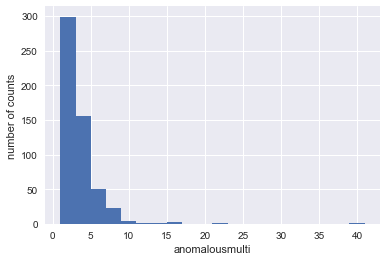

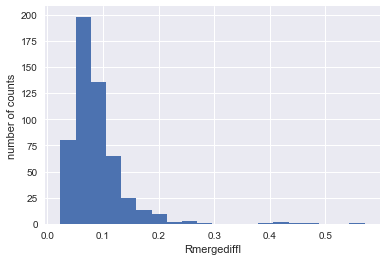

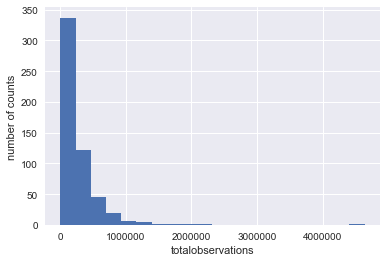

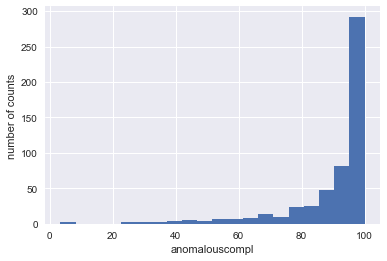

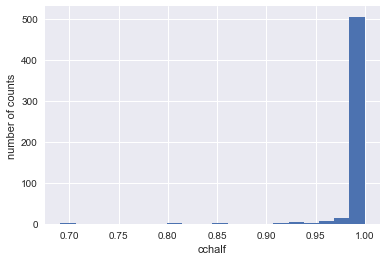

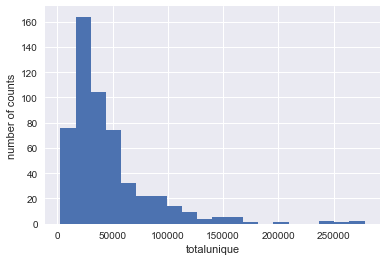

In [70]:
def plot_hist(data, itter):
  '''Plot a histogram for each feature.'''
  for name in itter:
    hist = plt.hist(data[name], bins=20)
    hist = plt.xlabel(name)
    hist = plt.ylabel('number of counts')
    plt.show()

plot_hist(X_train, data_columns_labels)

# calculate Pearson's correlation coefficients for all features in pairs and plot corresponding correlation matrix coloured by positive and negative correlation strength

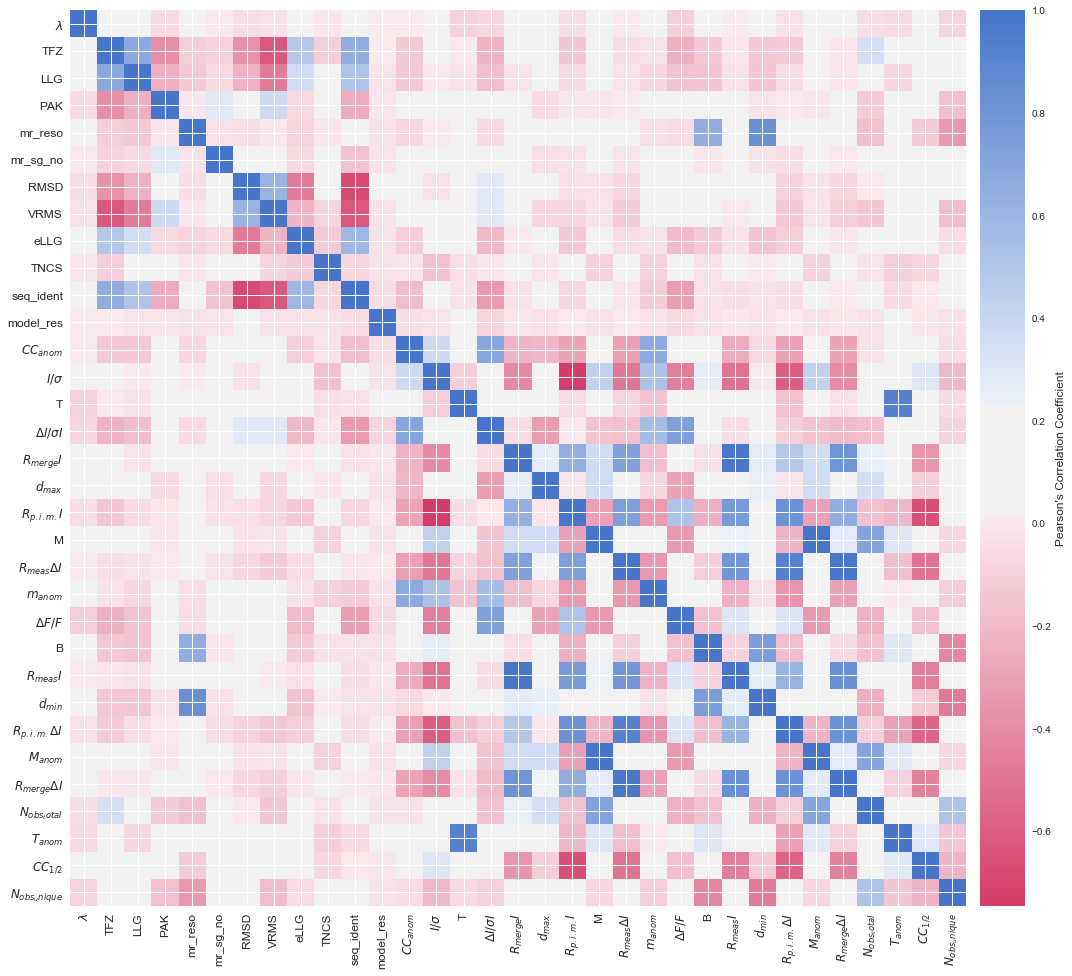

In [73]:
def feature_corr_mat(X_train):
  corr = X_train.corr()
      
  label_map = {
        'IoverSigma' : '$I/\sigma$', 
        'cchalf' : "$CC_{1/2}$", 
        'RmergeI' : '$R_{merge}I$',
        'RmergediffI' : '$R_{merge}\Delta I$', 
        'RmeasI' : '$R_{meas}I$',
        'RmeasdiffI' : '$R_{meas}\Delta I$',
        'RpimI' : '$R_{p.i.m.}I$',
        'RpimdiffI' : '$R_{p.i.m.}\Delta I$',
        'totalobservations' : '$N_{obs_total}$',
        'totalunique' : '$N_{obs_unique}$',
        'multiplicity' : 'M',
        'completeness' : 'T',
        'lowreslimit' : '$d_{max}$',
        'highreslimit' : '$d_{min}$',
        'wilsonbfactor' : 'B',
        'anomalousslope' : '$m_{anom}$',
        'anomalousCC' : '$CC_{anom}$',
        'anomalousmulti' : '$M_{anom}$',
        'anomalouscompl' : '$T_{anom}$',
        'diffI' : '$\Delta I/\sigma I$',
        'diffF' : '$\Delta F/F$',
        'wavelength' : '$\lambda$',
        'TFZ' : 'TFZ',
        'LLG' : 'LLG',
        'PAK' : 'PAK',
        'mr_reso' : 'mr_reso',
        'mr_sg_no' : 'mr_sg_no',
        'RMSD' : 'RMSD',
        'VRMS' : 'VRMS',
        'eLLG' : 'eLLG',
        'tncs' : 'TNCS',
        'seq_ident' : 'seq_ident',
        'model_res' : 'model_res'}

  yticklabels = [label_map[key] for key in corr.columns]
  xticklabels = [label_map[key] for key in corr.columns]
      
  fig = plt.figure(figsize=(15, 15))

  ax = plt.gca()
  im = ax.imshow(corr, cmap=sns.diverging_palette(0, 255, sep=32, n=256, center='light', as_cmap=True))  
  divider = make_axes_locatable(ax)
  cax = divider.append_axes('right', size='5%', pad=0.2)
  plt.colorbar(im, cax=cax).set_label("Pearson's Correlation Coefficient", fontsize=12)
  ax.set_xticks(np.arange(len(xticklabels)))
  ax.set_xticklabels(xticklabels, rotation=90, fontsize=12)
  ax.set_yticks(np.arange(len(yticklabels)))
  ax.set_yticklabels(yticklabels, fontsize=12)
  plt.tight_layout()
  plt.show()
    
feature_corr_mat(X_train)

# calculate scatter plot matrix where each scatter plot represents a pair of features

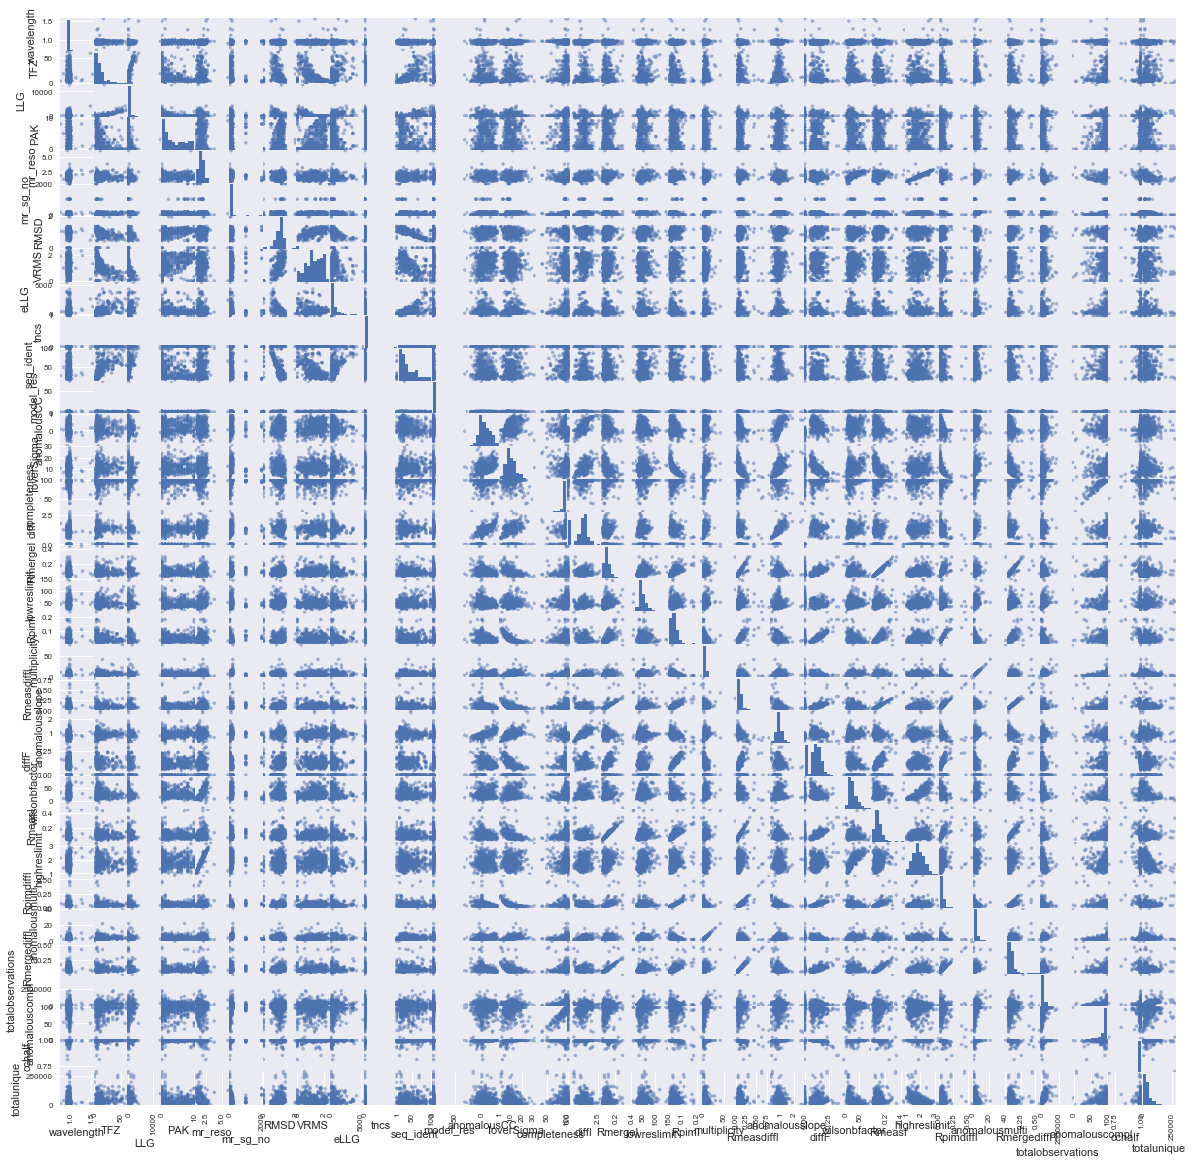

In [76]:
def plot_scatter_matrix(X_train):
  columns = [X_train.columns]
  for c in columns:
    if X_train.isnull().any().any() == True:
      X_train = X_train.dropna(axis=1)
  attr = list(X_train)    
  scatter_matrix(X_train[attr], figsize=(20,20))
  plt.show()  
  
plot_scatter_matrix(X_train)


# plotting probability density function for each feature to evaluate continous data and its cumulative distribution function

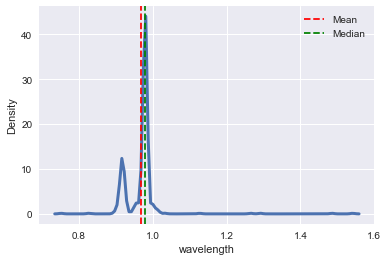

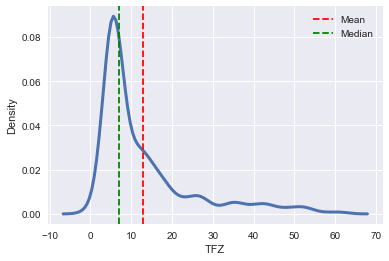

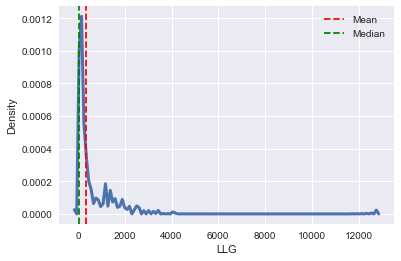

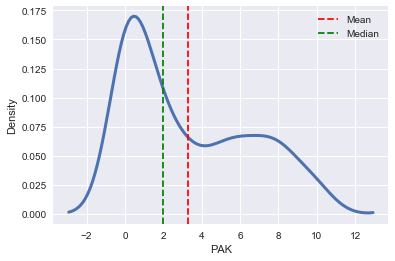

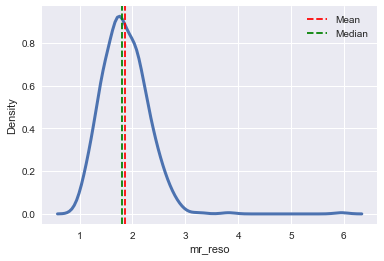

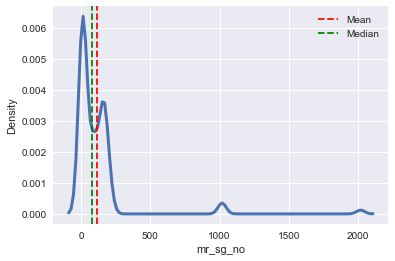

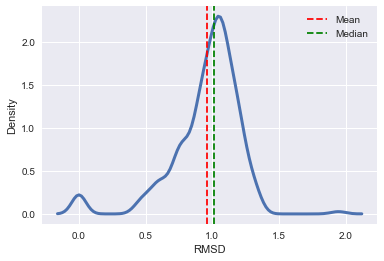

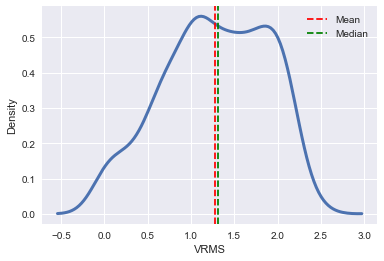

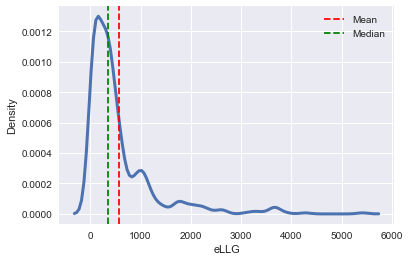

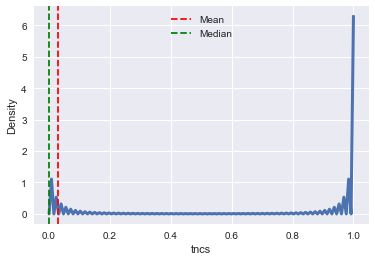

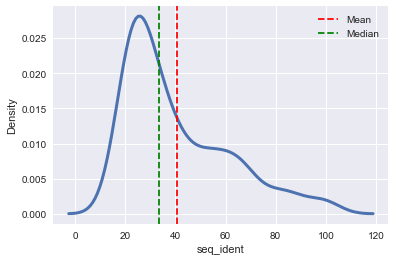

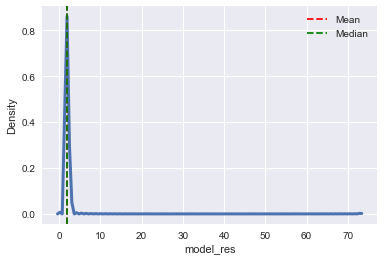

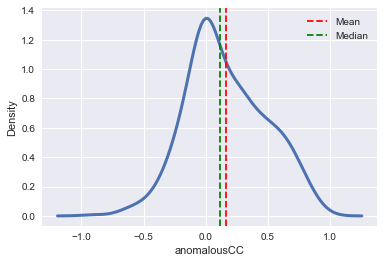

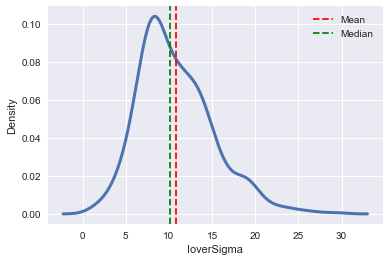

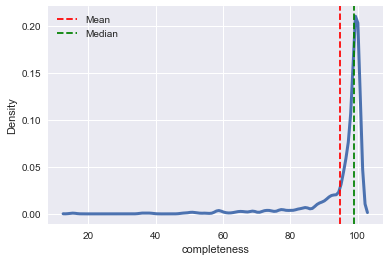

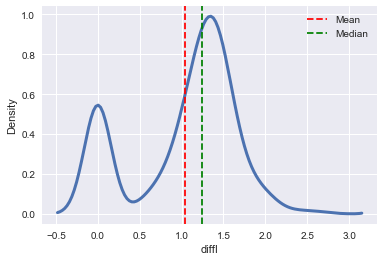

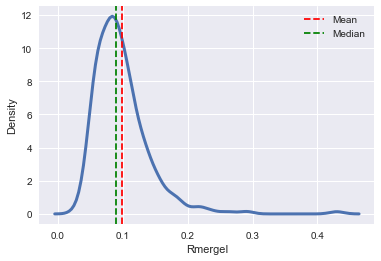

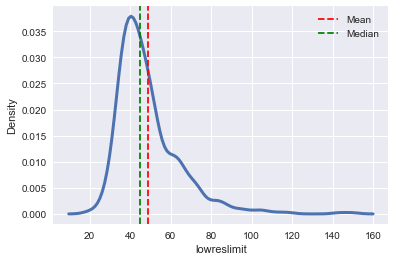

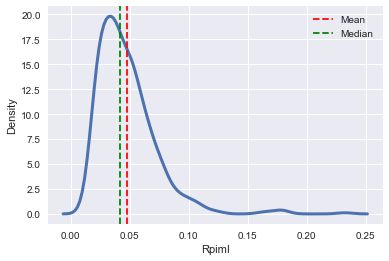

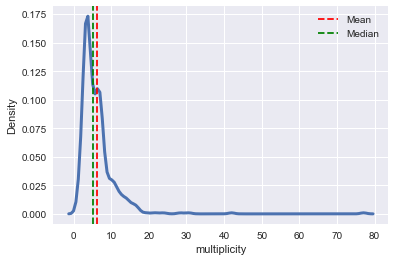

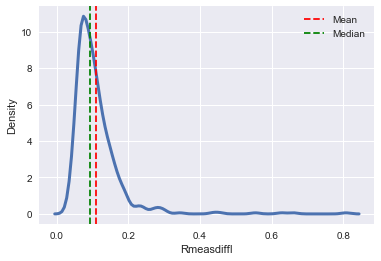

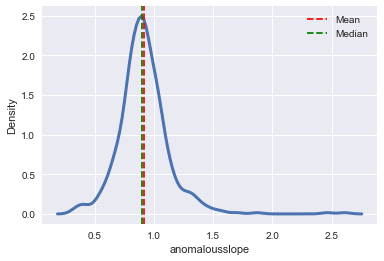

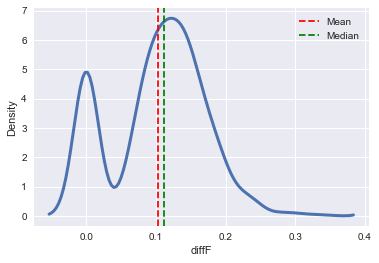

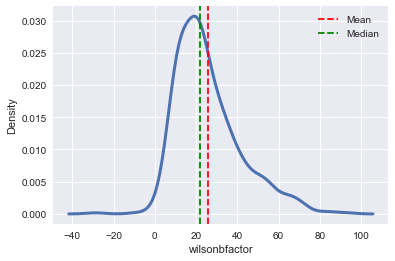

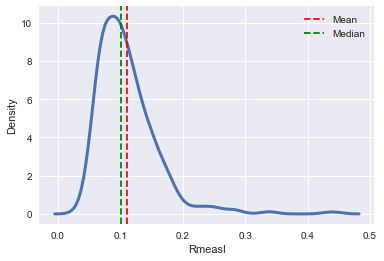

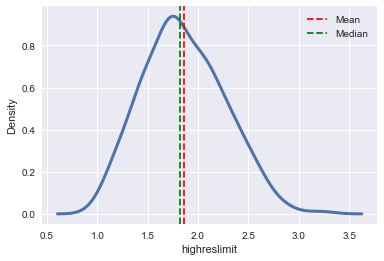

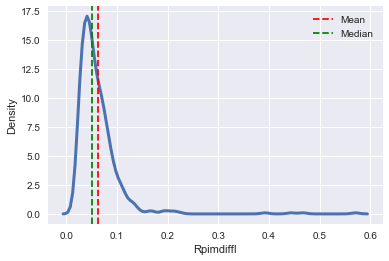

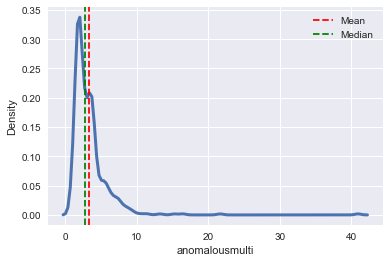

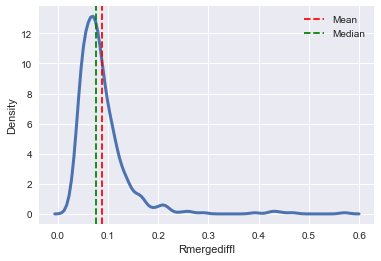

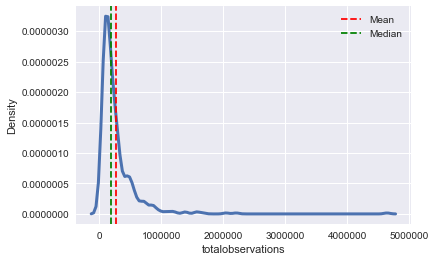

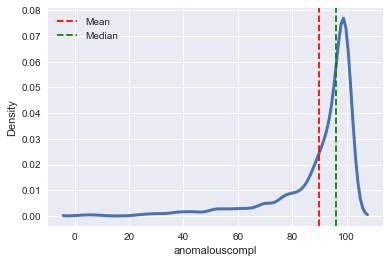

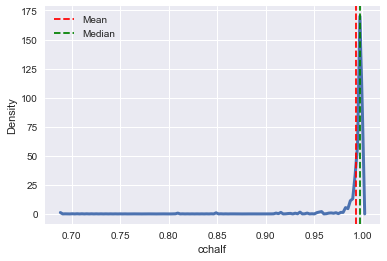

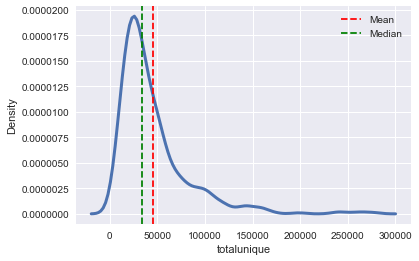

In [77]:
def plot_probability_density(X_train):
  itter = X_train.columns
  for name in itter:
    mean = np.mean(X_train[name])
    median = np.median(X_train[name])      
    sns.distplot(X_train[name], hist = False, kde = True,
               kde_kws = {'linewidth': 3})  
    plt.axvline(mean, label='Mean', color='r', linestyle='--')  
    plt.axvline(median, label='Median', color='g', linestyle='--')        
    plt.legend(loc='best')
    plt.xlabel(name)
    plt.ylabel('Density')
    plt.show()

plot_probability_density(X_train)

# plotting empirical cumulative distribution function for each feature

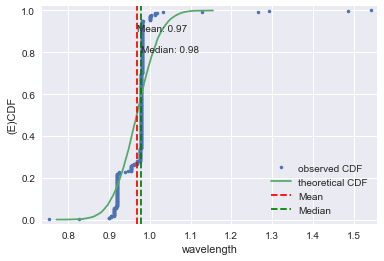

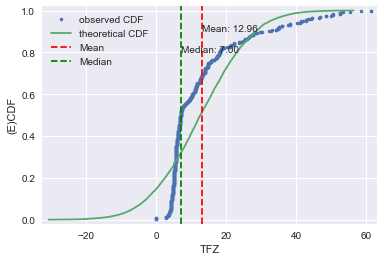

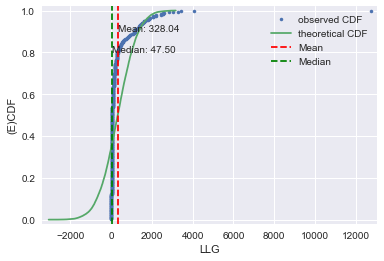

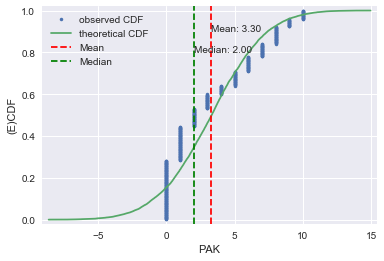

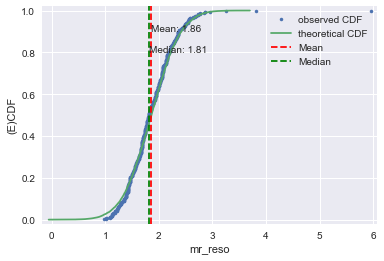

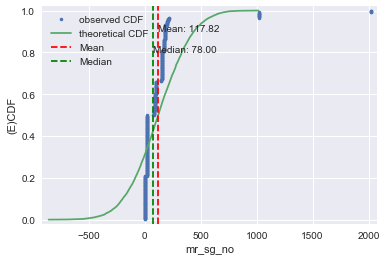

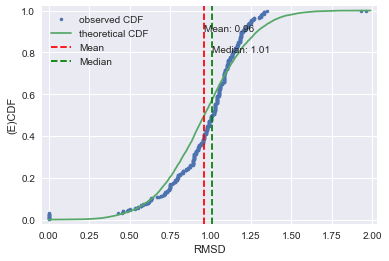

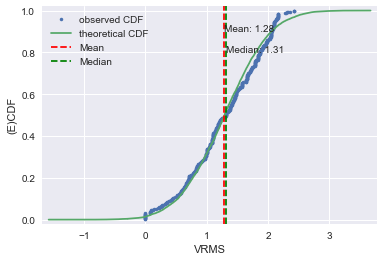

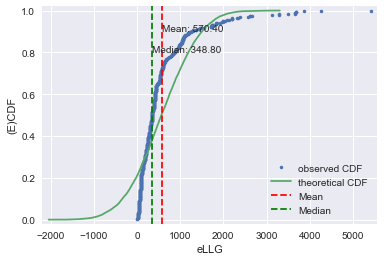

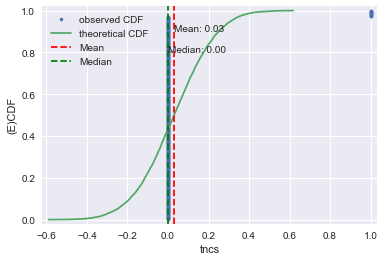

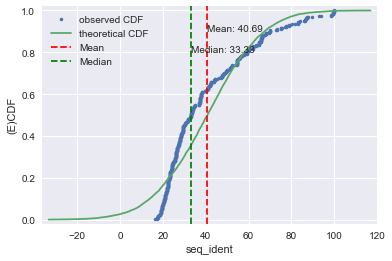

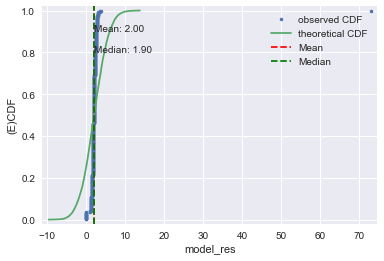

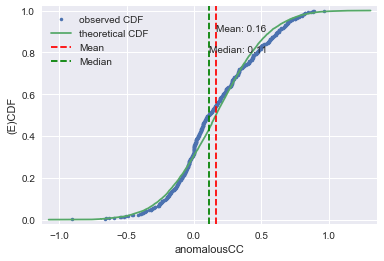

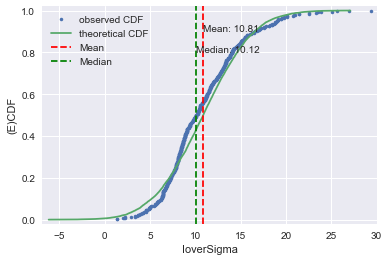

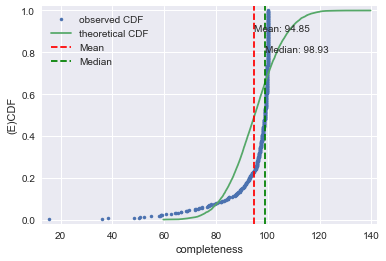

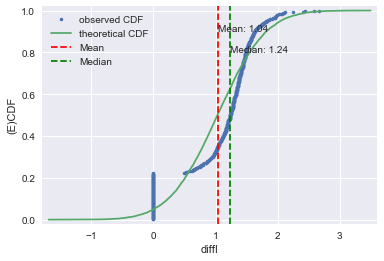

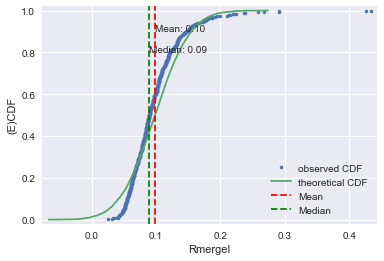

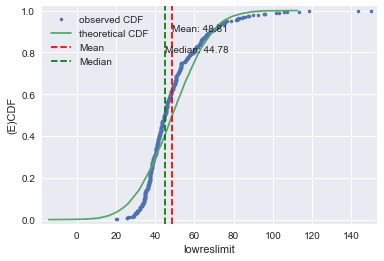

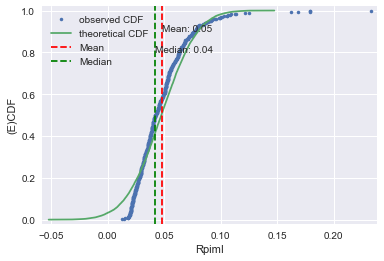

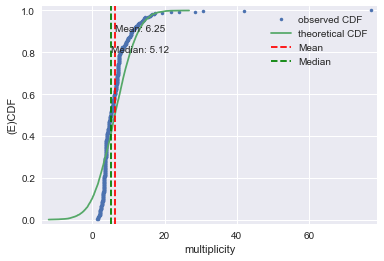

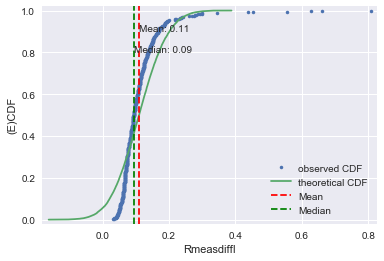

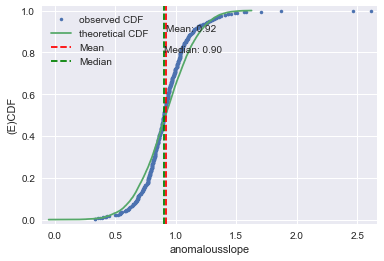

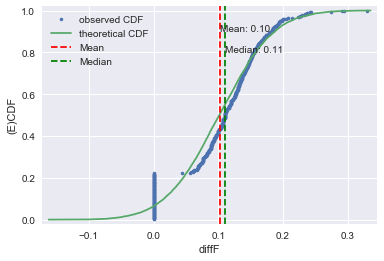

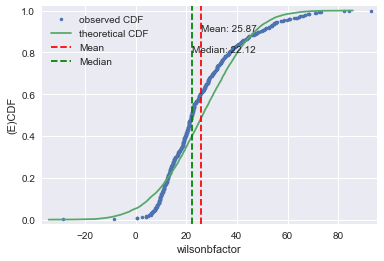

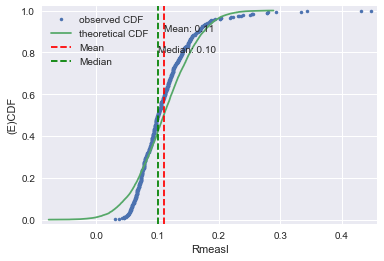

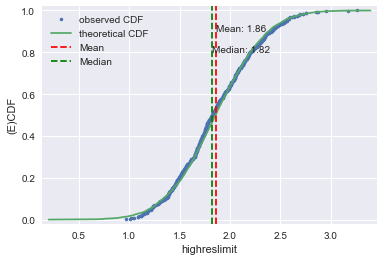

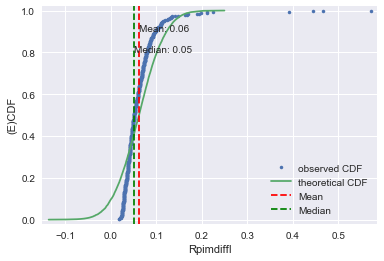

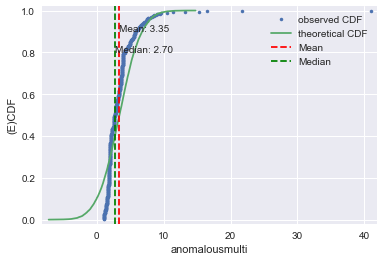

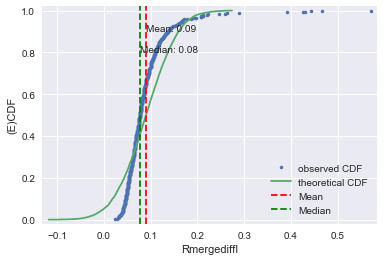

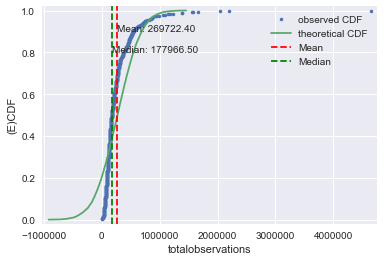

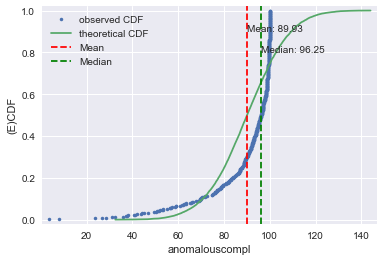

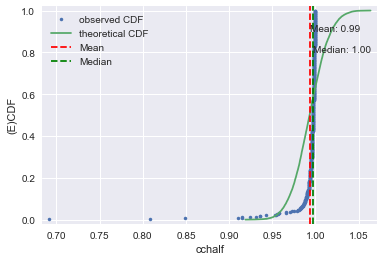

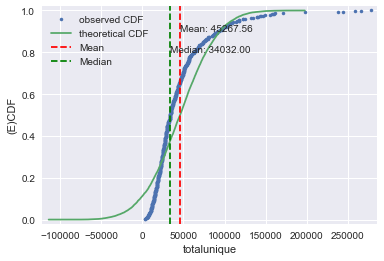

In [79]:
def plot_ecdf(X_train):
  itter = X_train.columns  
  for name in itter:
    #Number of data points:n
    n = len(X_train[name])
    #x-data for the ECDF:x
    x = np.sort(X_train[name])
    #y-data for the ECDF;y
    y = np.arange(1, n+1)/n
    mean = np.mean(X_train[name])
    median = np.median(X_train[name])
    std = np.std(X_train[name])
    percentile = np.percentile(X_train[name], [25, 50, 75])
    info = X_train[name].describe()
    samples = np.random.normal(mean, std, size=10000)
    n_theor = len(samples)
    x_theor = np.sort(samples)
    y_theor = np.arange(1, n_theor+1)/n_theor
    plt.plot(x, y, marker='.', linestyle='none', label='observed CDF')
    plt.plot(x_theor, y_theor, label='theoretical CDF')
    plt.axvline(mean, label='Mean', color='r', linestyle='--')
    plt.axvline(median, label='Median', color='g', linestyle='--')
    plt.text(mean, 0.9, 'Mean: %.2f' %mean)
    plt.text(median, 0.8, 'Median: %.2f' %median)
    plt.xlabel(name)
    plt.ylabel('(E)CDF')
    plt.margins(0.02)
    plt.legend(loc='best')
    plt.show()

plot_ecdf(X_train)

# Standardise data for PCA and recursive feature elimination with linear SVM

In [7]:
X_train_std = StandardScaler().fit_transform(X_train)

# Run PCA

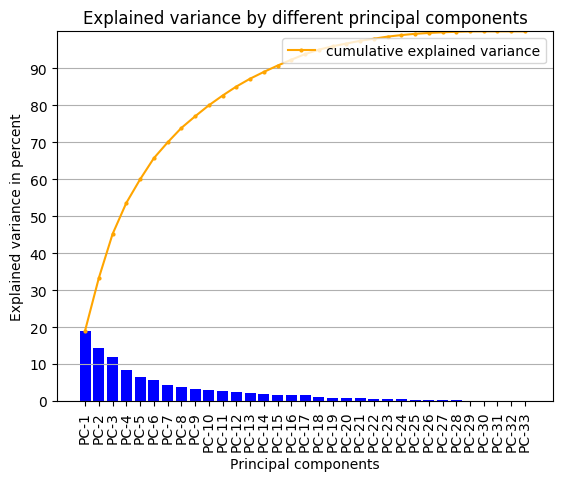

In [96]:
 def pca_manual(X_train_std):
  mean_vec = np.mean(X_train_std, axis=0)
  cov_mat = (X_train_std - mean_vec).T.dot((X_train_std - mean_vec)) / (X_train_std.shape[0]-1)
  cov_mat = np.cov(X_train_std.T)

  eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#  print('Eigenvectors \n%s' %eig_vecs)
#  print('\nEigenvalues \n%s' %eig_vals)
    
  for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev), decimal=2)
    
  eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

  # Sort the (eigenvalue, eigenvector) tuples from high to low
  eig_pairs.sort()
  eig_pairs.reverse()
#  print('Eigenvalues in descending order:')
#  for i in eig_pairs:
#    print(i[0])

  tot = sum(eig_vals)
  var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
  cum_var_exp = np.cumsum(var_exp)
  
  PCs = ['PC-1','PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6', 'PC-7', 'PC-8',
         'PC-9', 'PC-10', 'PC-11', 'PC-12', 'PC-13', 'PC-14', 'PC-15',
         'PC-16', 'PC-17', 'PC-18', 'PC-19', 'PC-20', 'PC-21', 'PC-22',
         'PC-23', 'PC-24', 'PC-25', 'PC-26', 'PC-27', 'PC-28', 'PC-29',
         'PC-30', 'PC-31', 'PC-32', 'PC-33']   
      
  plt.rcdefaults()
  fig, ax = plt.subplots()
  height = var_exp
  y_pos = range(len(PCs))
  height2 = cum_var_exp
  ax.bar(y_pos, height, align='center', color='blue')
  ax.plot(y_pos, height2, marker='o', markersize=2, color='orange', label='cumulative explained variance')
  plt.xticks(y_pos, PCs, rotation=90)
  plt.yticks(np.arange(0, 100, step=10))
  plt.title('Explained variance by different principal components')
  plt.ylabel('Explained variance in percent')
  plt.xlabel('Principal components')
  plt.legend(loc="upper right")
  ax.set_ylim((0, 100))
  plt.grid(True, axis='y', which='both')
  plt.show()

pca_manual(X_train_std)

# PCA to get 95% coverage

In [109]:
def run_pca_reduced(X_train_std):
  pca = PCA(n_components=0.95)#calculate the PCs to explain 95% of variance
  X_train_std_reduced = pca.fit_transform(X_train_std)
  coverage = pca.explained_variance_ratio_
  print(coverage)
  max_num_pc = len(pca.explained_variance_ratio_)
  print('Max number PCs needed for 95% coverage', max_num_pc)
  print(pca.singular_values_)
  return max_num_pc

run_pca_reduced(X_train_std)

[ 0.19025558  0.14234942  0.11902036  0.08427581  0.0635608   0.05733968
  0.04260253  0.03914668  0.03147224  0.02982362  0.02639139  0.02442401
  0.02124035  0.01832076  0.01717992  0.01585996  0.01519028  0.01204179]
Max number PCs needed for 95% coverage 18
[ 58.11882286  50.27197581  45.96833201  38.68116697  33.59253647
  31.90624774  27.50209815  26.36304593  23.6380671   23.01061718
  21.64607817  20.823638    19.41909328  18.03515229  17.4645993
  16.78027986  16.42218595  14.6215583 ]


18

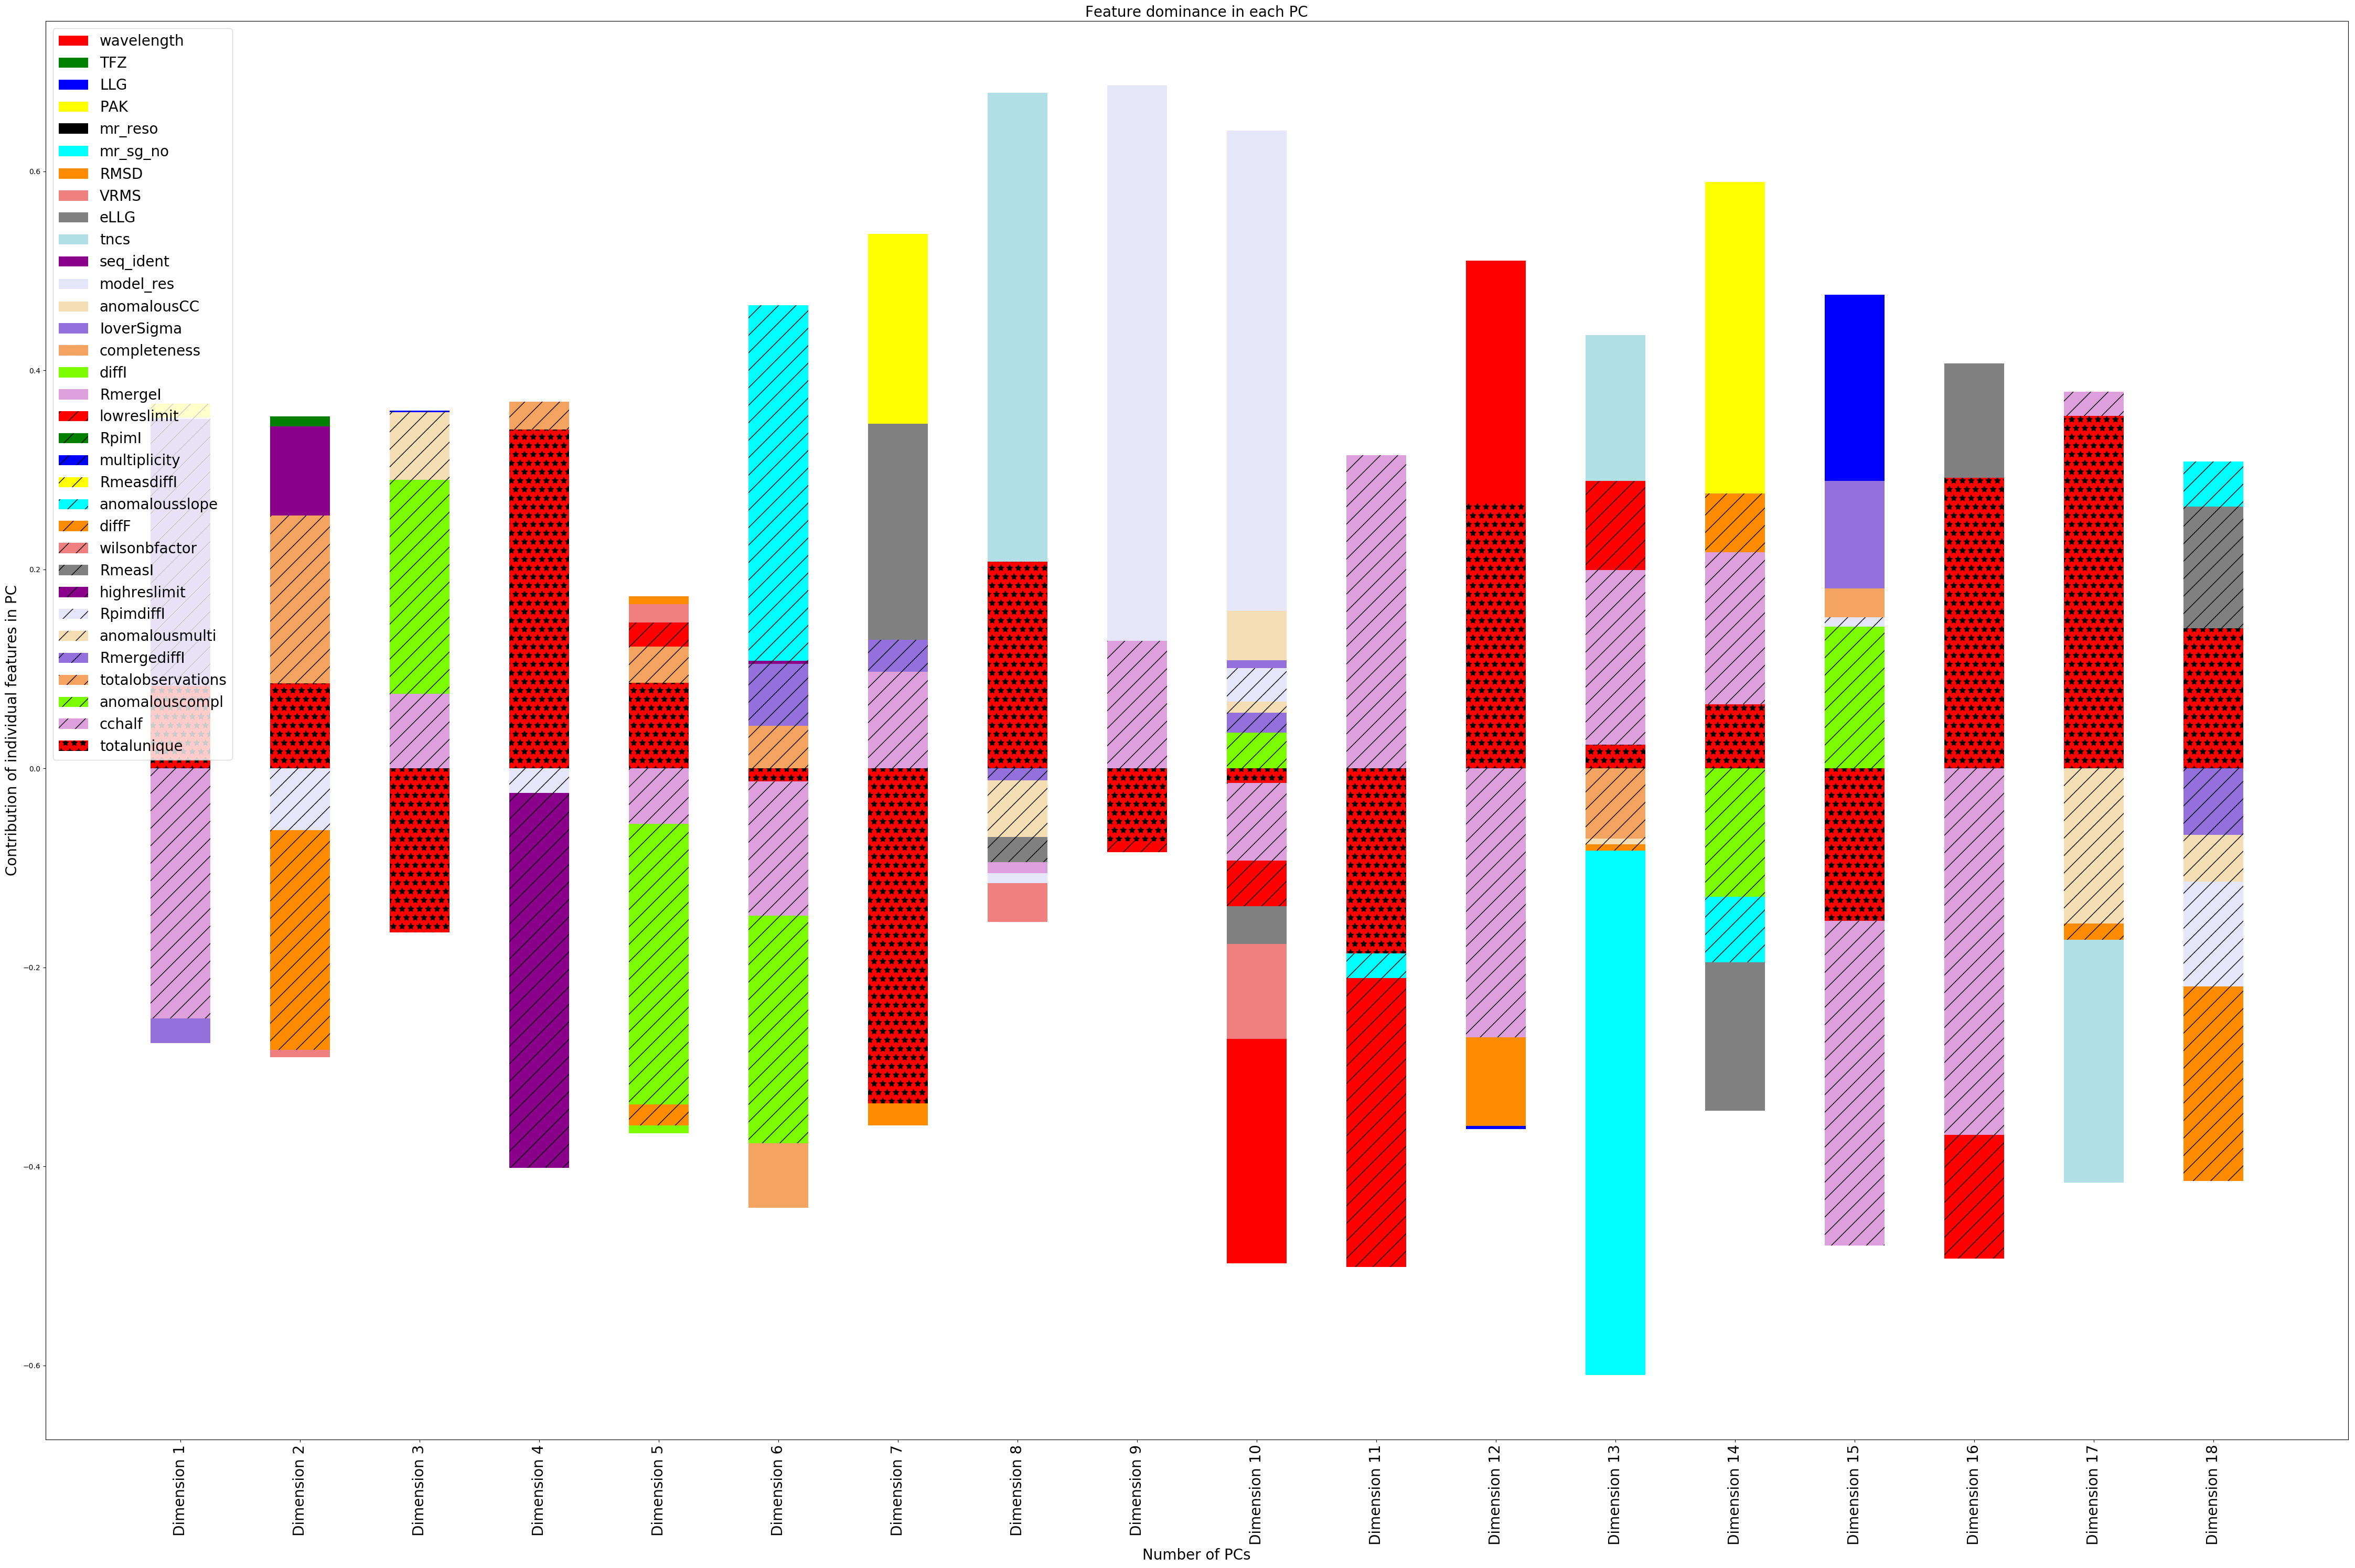

In [110]:
def feature_weights(X_train_std, columns, max_num_pc):
  pca = PCA(n_components = max_num_pc)
  pca.fit_transform(X_train_std)
  dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
             
  df = pd.DataFrame(pca.components_, columns=columns, index = dimensions)     
  df_i = df.T
  lab_i = df_i.columns
  N_i = len(lab_i)
  ind_i = np.arange(N_i)
  width = 0.5

  plt.figure(figsize=(45,30))

  p1_i = plt.bar(ind_i, df_i.iloc[0], width, color='red')
  p2_i = plt.bar(ind_i, df_i.iloc[1], width, color='green')
  p3_i = plt.bar(ind_i, df_i.iloc[2], width, color='blue')
  p4_i = plt.bar(ind_i, df_i.iloc[3], width, color='yellow')
  p5_i = plt.bar(ind_i, df_i.iloc[4], width, color='black')
  p6_i = plt.bar(ind_i, df_i.iloc[5], width, color='cyan')
  p7_i = plt.bar(ind_i, df_i.iloc[6], width, color='darkorange')
  p8_i = plt.bar(ind_i, df_i.iloc[7], width, color='lightcoral')
  p9_i = plt.bar(ind_i, df_i.iloc[8], width, color='gray')
  p10_i = plt.bar(ind_i, df_i.iloc[9], width, color='powderblue')
  p11_i = plt.bar(ind_i, df_i.iloc[10], width, color='darkmagenta')
  p12_i = plt.bar(ind_i, df_i.iloc[11], width, color='lavender')
  p13_i = plt.bar(ind_i, df_i.iloc[12], width, color='wheat')
  p14_i = plt.bar(ind_i, df_i.iloc[13], width, color='mediumpurple')
  p15_i = plt.bar(ind_i, df_i.iloc[14], width, color='sandybrown')
  p16_i = plt.bar(ind_i, df_i.iloc[15], width, color='lawngreen')
  p17_i = plt.bar(ind_i, df_i.iloc[16], width, color='plum')
  p18_i = plt.bar(ind_i, df_i.iloc[17], width, color='red', hatch="/")
  p19_i = plt.bar(ind_i, df_i.iloc[18], width, color='green', hatch="/")
  p20_i = plt.bar(ind_i, df_i.iloc[19], width, color='blue', hatch="/")
  p21_i = plt.bar(ind_i, df_i.iloc[20], width, color='yellow', hatch="/")
  p22_i = plt.bar(ind_i, df_i.iloc[21], width, color='cyan', hatch="/")
  p23_i = plt.bar(ind_i, df_i.iloc[22], width, color='darkorange', hatch="/")
  p24_i = plt.bar(ind_i, df_i.iloc[23], width, color='lightcoral', hatch="/")
  p25_i = plt.bar(ind_i, df_i.iloc[24], width, color='gray', hatch="/")
  p26_i = plt.bar(ind_i, df_i.iloc[25], width, color='darkmagenta', hatch="/")
  p27_i = plt.bar(ind_i, df_i.iloc[26], width, color='lavender', hatch="/")
  p28_i = plt.bar(ind_i, df_i.iloc[27], width, color='wheat', hatch="/")
  p29_i = plt.bar(ind_i, df_i.iloc[28], width, color='mediumpurple', hatch="/")
  p30_i = plt.bar(ind_i, df_i.iloc[29], width, color='sandybrown', hatch="/")
  p31_i = plt.bar(ind_i, df_i.iloc[30], width, color='lawngreen', hatch="/")
  p32_i = plt.bar(ind_i, df_i.iloc[31], width, color='plum', hatch="/")
  p33_i = plt.bar(ind_i, df_i.iloc[32], width, color='red', hatch="*")
           
  plt.title('Feature dominance in each PC', fontsize=20)
  plt.xlabel('Number of PCs', fontsize=20)
  plt.ylabel('Contribution of individual features in PC', fontsize=20)
  plt.xticks(ind_i, lab_i, rotation=90, fontsize=20)
  plt.legend(labels=df_i.index, loc='best', fontsize=20)
  plt.tight_layout()
  plt.show()

feature_weights(X_train_std, X_train.columns, max_num_pc)     

[False  True  True False False False  True  True  True False False  True
 False False False False False False False False False False False False
 False False False False False False False False False]
Feature ranking : [27  1  1  2 22 28  1  1  1 10  3  1 11 20  8 13  7 24 12 21 26 23 19 15 16
  4 17 14 18  6  9  5 25] 

Features sorted by their rank: 

[(1, 'LLG'), (1, 'RMSD'), (1, 'TFZ'), (1, 'VRMS'), (1, 'eLLG'), (1, 'model_res'), (2, 'PAK'), (3, 'seq_ident'), (4, 'highreslimit'), (5, 'cchalf'), (6, 'totalobservations'), (7, 'RmergeI'), (8, 'completeness'), (9, 'anomalouscompl'), (10, 'tncs'), (11, 'anomalousCC'), (12, 'RpimI'), (13, 'diffI'), (14, 'anomalousmulti'), (15, 'wilsonbfactor'), (16, 'RmeasI'), (17, 'RpimdiffI'), (18, 'RmergediffI'), (19, 'diffF'), (20, 'IoverSigma'), (21, 'multiplicity'), (22, 'mr_reso'), (23, 'anomalousslope'), (24, 'lowreslimit'), (25, 'totalunique'), (26, 'RmeasdiffI'), (27, 'wavelength'), (28, 'mr_sg_no')]
Optimal number of features : 6


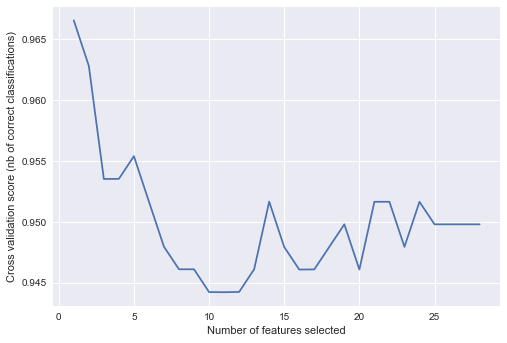

In [8]:
def run_rfecv_and_plot(X_train_std, columns, y_train):
  svc = SVC(kernel="linear", C=0.1, class_weight='balanced')
  # The "accuracy" scoring is proportional to the number of correct
  # classifications
  rfecv = RFECV(estimator = svc, step=1, min_features_to_select=6, cv=StratifiedKFold(3), scoring='accuracy')
  rfecv.fit(X_train_std, y_train)
      
  feature_names = columns
      
  feature_selection = rfecv.support_
  print(feature_selection)
      
  feature_ranking = rfecv.ranking_
  print('Feature ranking : %s \n' % feature_ranking)      
  print('Features sorted by their rank: \n')
  print(str(sorted(zip(map(lambda x: round(x, 4), feature_ranking), feature_names))))            
  print("Optimal number of features : %d" % rfecv.n_features_)
      
  # Plot number of features VS. cross-validation scores
  plt.figure()
  plt.xlabel("Number of features selected")
  plt.ylabel("Cross validation score (nb of correct classifications)")
  plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
  plt.show()

run_rfecv_and_plot(X_train_std, X_train.columns, y_train)
